In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Check if there are null values by comparing it with the shape
df = pd.read_csv("test.csv")
print(df.info())
print(df.shape)
print('Class labels:', np.unique(df.label))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
x        9000 non-null float64
y        9000 non-null float64
label    9000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 211.0 KB
None
(9000, 3)
Class labels: [0 1 2 3]


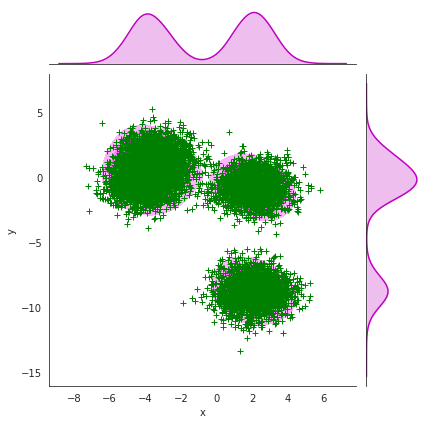

In [4]:
with sns.axes_style('white'):
    g = sns.jointplot("x", "y", df, kind='kde', color="m");
    g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
    g.ax_joint.collections[0].set_alpha(0)


#One of the two categories is severely overlapping with the other
#We have to figure out which one.


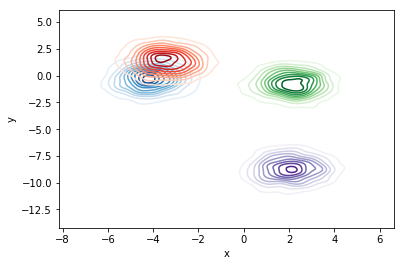

In [13]:
l0 = df['label'] == 0
l1 = df['label'] == 1
l2 = df['label'] == 2
l3 = df['label'] == 3
df0 = df.loc[l0]
df1 = df.loc[l1]
df2 = df.loc[l2]
df3 = df.loc[l3]

ax = sns.kdeplot(df0.x, df0.y,
                 cmap="Blues", shade=False, shade_lowest=False)

ax = sns.kdeplot(df3.x, df3.y,
                 cmap="Reds", shade=False, shade_lowest=False)

ax = sns.kdeplot(df2.x, df2.y,
                 cmap="Purples", shade=False, shade_lowest=False)

ax = sns.kdeplot(df1.x, df1.y,
                 cmap="Greens", shade=False, shade_lowest=False)

#Labels 0 and 3 are overlapping. Accuracy will be low for data in the overlapping region with the labels 0 or 3. 

In [6]:
#Splitting data into 70% training and 30% test data:


from sklearn.model_selection import train_test_split

X =  df.iloc[:,0:2]
y = df.iloc[:,2,]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 2)
(6300,)
(2700, 2)
(2700,)


In [7]:
#Standardizing the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
#Training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs',
    multi_class='multinomial').fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
print(y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[0 1 0 ... 1 2 2]
Misclassified samples: 253
Accuracy: 0.91


In [59]:
#Training a SVM model with scikit-learn 
#Done for comparison purposes
from sklearn.svm import SVC

svm = SVC(C=0.009, gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


[0 1 0 ... 1 2 2]
Misclassified samples: 251
Accuracy: 0.91


In [25]:
#Final function to be testged with the actual test data
#Here complete data set is used to train the model
#Logistic regression model is being used

def predictFunction(x, y):
    K = np.array([x, y])
    df = pd.read_csv("test.csv")
    X =  df.iloc[:,0:2]
    y = df.iloc[:,2,]
    sc = StandardScaler()
    sc.fit(X)
    clf = LogisticRegression(random_state=0, solver='lbfgs',
    multi_class='multinomial').fit(X, y)
    return clf.predict(np.array([K]))


In [11]:
y_pred = predictFunction(-5, 2.5)
print(y_pred)

[3]
